## Project Aim

The aim of this project is to develop a model that uses a number of features of various cars to make a prediction about the price of car of interest. The cars being considered in this project were available to the US import market in 1985.

This project forms part of an ongoing Data Science course and is also aimed at gaining experience in the use of the K-Nearest Neighbour algorithm, as implemented by the scikit-learn python library.

### Dataset

The dataset used is an abstract from the 1985 Ward's Automotive Yearbook and is available as csv file. Information about the dataset can be found here: https://archive.ics.uci.edu/ml/datasets/automobile

In [84]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

cars = pd.read_csv('imports-85.data', header=None)
cars.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars.info()
#or make a list of column names and pass in read_csv for 'names' parameter

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

## Data Set Information:

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

### Attribute Information: Attribute: Attribute Range

symboling: -3, -2, -1, 0, 1, 2, 3.
normalized-losses: continuous from 65 to 256.
make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo

fuel-type: diesel, gas.

1. aspiration: std, turbo.
2. num-of-doors: four, two.
3. body-style: hardtop, wagon, sedan, hatchback, convertible.
4. drive-wheels: 4wd, fwd, rwd.
5. engine-location: front, rear.
6. wheel-base: continuous from 86.6 to 120.9.
7. length: continuous from 141.1 to 208.1.
8. width: continuous from 60.3 to 72.3.
9. height: continuous from 47.8 to 59.8.
10. curb-weight: continuous from 1488 to 4066.
11. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
12. num-of-cylinders: eight, five, four, six, three, twelve, two.
13. engine-size: continuous from 61 to 326.
14. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
15. bore: continuous from 2.54 to 3.94.
16. stroke: continuous from 2.07 to 4.17.
17. compression-ratio: continuous from 7 to 23.
18. horsepower: continuous from 48 to 288.
19. peak-rpm: continuous from 4150 to 6600.
20. city-mpg: continuous from 13 to 49.
21. highway-mpg: continuous from 16 to 54.
22. price: continuous from 5118 to 45400.

### Potential feature columns

In [100]:
potential_features = ['normalized-losses','wheel-base', 'length', 'width', 'height', 'curb-weight', 
       'engine-size','bore', 'stroke',
       'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'price']
cars_modified = cars[potential_features]
cars_modified

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,17450
5,?,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25,17710
7,?,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20,23875
9,?,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,160,5500,16,22,?


## Data cleaning

We need to set the '?' values, used in the dataset to numpy.nan values, so that analysis is possible. Also, with 'price' being the target column, we need values in all rows and will therefore delete any rows missing 'price' values

In [86]:
cars_modified = cars_modified.replace('?', np.nan)
cars_modified = cars_modified.astype('float')
cars_modified.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [102]:
cars_modified = cars_modified.dropna(subset=['price'])


### Dealing withe the 'normalized_losses' column

With 37 nan's in this column, accounting for nearly 20% of all rows, I have decided that the use of the mean value would significantly impact on possible results if this column was used. We will therefore drop this column from the dataset.

In [101]:
cars_modified=cars_modified.fillna(cars_modified.mean())

## Normalising the feature columns

Having cleaned all of the potential features of interest, we need to normalise all these columns so that they each do not have an overly significant impact on the analysis.

An excellent article, that summarises the various normalization techniques, can be found here: https://analystanswers.com/data-normalization-techniques-easy-to-advanced-the-best/

The method we shall use for this analysis is the Linear Normalization technique, also known as 'Max-Min'.

In [89]:
price_col = cars_modified['price']
cars_normalized = (cars_modified - cars_modified.min())/(cars_modified.max()-cars_modified.min())
cars_normalized['price'] = price_col
cars_normalized.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Data analysis

We are now ready to start our analysis of the various features to determine which give best performance in any model.

We start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps to structure the code workflow and understand the features better.

### Pearson Correlation

Let us first of all simply look at the Pearson Correlation between all of the features, to see if there are any likely dependencies between any of the features and then we can try to identify any likely candidates for our model based on their correlations with the 'price' target.

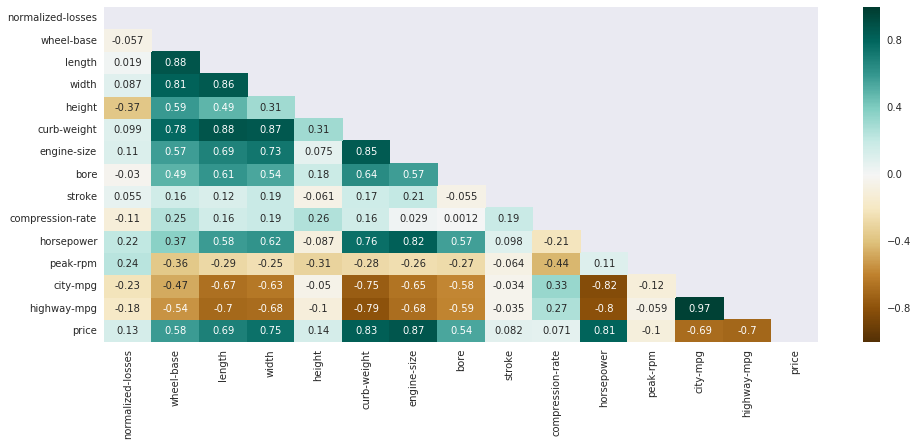

In [90]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(cars_normalized.corr(), dtype=np.bool))
heatmap = sns.heatmap(cars_normalized.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

We can see some obvious connections between certain features in the dataset. For example:

city_mpg and highway_mpg
wheel_base, length, width and curb_weight
If we included a number of these related features in our model, that interrelationship could bias our model towards these features, so we do need to be mindful of this.

Now let's look at any correlations between all of the features and the 'price' target.

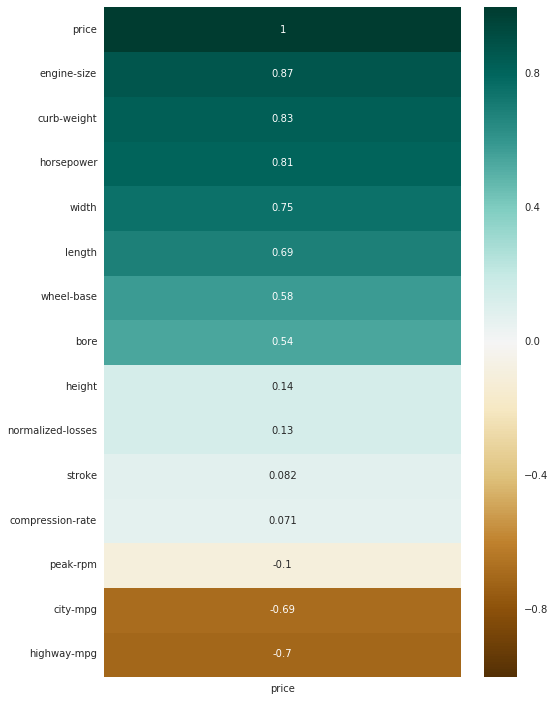

In [91]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(cars_normalized.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

The graph above shows there are relatively strong positive correlations between 'price' and:

- engine_size
- curb_weight
- horsepower

Whereas there are relatively strong negative correlations between 'price' and the economic factors of:

- highway_mpg
- city_mpg

## Using the scikit-learn's KNeighborsRegressor to identify candidate features
To further explore the possible candidates for inclusion in the model we shall scikit-learn's KNeighborsRegressor algorithm to do an inital assessment of the results obtained for all features. Initially, we shall use the algorithm's default parameter settings, apart from stipulating the algorithm uses the auto method is used, which is suitable for small samples such as the dataset that we are working with here. We will simply split the dataset into two halves: 50% as the training set and 50% as the test set. We shall use Root Mean Square Error (RMSE) obtained for each feature as the performance score.

In [92]:
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    train_last_row = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:train_last_row]
    test_df = rand_df.iloc[train_last_row:]
    
    knn.fit(train_df[[train_col]], train_df[target_col])
    predictions = knn.predict(test_df[[train_col]])
    
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = mse**(1/2)
    return rmse

In [93]:
rmse_results = {}
train_col = cars_normalized.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_col:
    rmse_val = knn_train_test(col, 'price', cars_normalized)
    rmse_results[col] = rmse_val

rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

### Results from using the standard settings

'engine_size' (RMSE 3126) is significantly better than the other features, with 'horsepower' (RMSE 4032) also fairly good and the following 4 features, down to 'city_mpg' giving similar results (RMSE's of 4400 to 4650).

### Exploring how varying the k-value, used in the KNeighborsRegressor, impacts on the results obtained
We shall now run the same exercise, but this time we shall vary the k-value to see what the optimum k-value should be. We shall use k-values between 1 and 9, and then visualise the results using a line graph.

In [94]:
def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    train_last_row = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:train_last_row]
    test_df = rand_df.iloc[train_last_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}

    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        predictions = knn.predict(test_df[[train_col]])
    
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = mse**(1/2)
        k_rmses[k] = rmse
        
    return k_rmses

In [95]:
k_rmse_results = {}
train_col = cars_normalized.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_col:
    rmse_val = knn_train_test(col, 'price', cars_normalized)
    k_rmse_results[col] = rmse_val

k_rmse_results


{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885

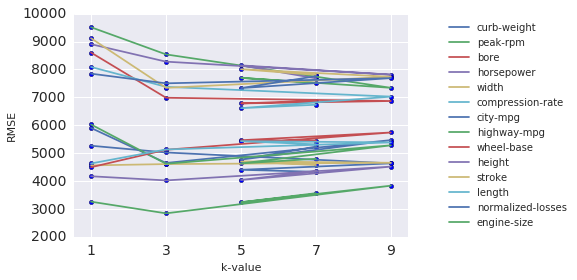

In [96]:
for k,v in k_rmse_results.items():
    x=list(v.keys())
    y=list(v.values())
    
    plt.scatter(x,y)
    plt.plot(x,y)
    plt.xlabel('k-value')
    plt.ylabel('RMSE')
    plt.xticks([1,3,5,7,9], fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(k_rmse_results, frameon=False, bbox_to_anchor=(1.5, 1))

## Developing a Multivariate Model

By averaging the RMSE values obtained for each feature, across all of the k-values calculated above, and then selecting the best performing features from a sorted list of the results, we will hopefully be looking at those features whose performance is not overly dependent on the algorithm's parameters

In [97]:
# Computing the average RMSE across the various k-values and sorting the features by performance.

average_rmses={}
for k,v in k_rmse_results.items():
    average_rmse = np.mean(list(v.values()))
    average_rmses[k] = average_rmse
    
series_average_rmses = pd.Series(average_rmses)
sorted_average_rmse = series_average_rmses.sort_values()
print(sorted_average_rmse)
sorted_features = sorted_average_rmse.index


engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


Having sorted the RMSE results for all features, we will now run five models, consisting of:

1. just the best performer in model 1
2. the two best performers in model 2;
3. and so on, to the best five performers being included in model 5

We shall limit it to the best five features, because if we go beyond number five ('curb_weight') we are moving into the area where there are too many interrelated features being used in our model, which could negatively impact on the models overall suitability.

We shall also continue our exploration of the correct k-value that we should use in the final model, by again running each of these models with various k-values - 1 through 8.

In [98]:
def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    train_last_row = int(len(rand_df)/2)
    train_df = rand_df.iloc[0:train_last_row]
    test_df = rand_df.iloc[train_last_row:]
    
    k_values = [1,2,3,4,5,6,7,8,9,10]
    k_rmses = {}

    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_col], train_df[target_col])
        predictions = knn.predict(test_df[train_col])
    
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = mse**(1/2)
        k_rmses[k] = rmse
        
    return k_rmses

multivariate_results = {}
for nr_best_features in range(2,7):
    multivariate_results['{} Best Features:'.format(nr_best_features)] = knn_train_test(sorted_features[:nr_best_features], 'price', cars_normalized)

multivariate_results

{'2 Best Features:': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937},
 '3 Best Features:': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163},
 '4 Best Features:': {1: 2952.725686581471,
  2: 3131.704952720018,
  3: 3129.692821910155,
  4: 3241.4320776448717,
  5: 3487.340917327035,
  6: 3637.0381471429987,
  7: 3606.195077860286,
  8: 3809.9307026308247,
  9: 3875.274902378068,
  10: 3997.1583055842293},
 '5 Best Features:': {1: 2824.7061233282866,
  2: 2915.6731645496975,
  3: 3012.4204546509704,
  4: 3202.8876051367483,
  5: 3410.2170133901805,
  6: 3618.4509432660384,
  7: 3622.6290209234803,
  8

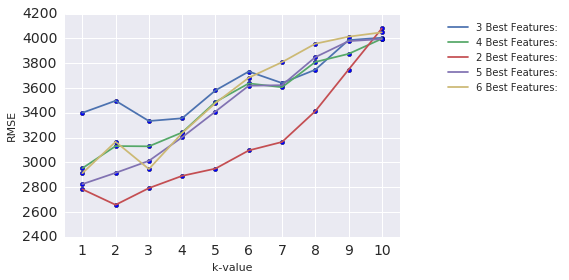

In [99]:
for k,v in multivariate_results.items():

    x = list(v.keys())
    y = list(v.values())
    
    plt.scatter(x,y)
    plt.plot(x,y, label="{}".format(k))
    plt.xlabel('k-value')
    plt.ylabel('RMSE')
    plt.xticks([1,2,3,4,5,6,7,8,9,10], fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(frameon=False, bbox_to_anchor=(1.5, 1))

### Best results from the initial Multivariate Model analysis

This analysis has indicated that a model containing the two features - engine_size and horsepower - would appear to give the best results across the board.

If we use a k-value of 2, the performance of this two-feature model results in an RMSE value of USD 2658.

Our model is therefore able to predict the 'price' of cars in the test set to an accuracy of USD 2,658. This is across actual price values between USD 5,118 and USD 45,400 - ie a range of USD 40,000. This means the error in our predicted prices is likely to be approximatly 7% of actual prices.

## Project Conclusion

This project has developed a model for predicting the price of imported cars based on a number of features relevant to each car, as available from a 1985 dataset of car imports into the USA.

### The Model

The best peforming prediction model for 'price' consists of:

- two predictor variables - 'engine_size' and 'horsepower'
- utilises the KNeighborRegressor from the scikit-learn library
- uses the default paramaters for this algorithm, apart from the 'n_neighbors' parameter which should be set to 2 (instead of the default of 5).

### Model performance

The Root Mean Squared Error (RMSE) achieved with this model is USD 2,658, which implies that our predicted 'prices' will be off, on average, by USD 2,658. Across a range of prices in our dataset of approximately USD 40,000, this means we will typically be about 7% out.

### Model limitations

The use of this model is restricted to predicting the prices of cars imported into the USA in 1985. The project has not looked at the effects of extrapolating this model outside of this market.